In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.neural_network import MLPRegressor

In [3]:
df = pd.read_csv("./data_cleaned.csv")
df.head()
df.drop (['avg_price_year_type'], inplace=True, axis=1)

In [19]:
df_converted = df.copy()

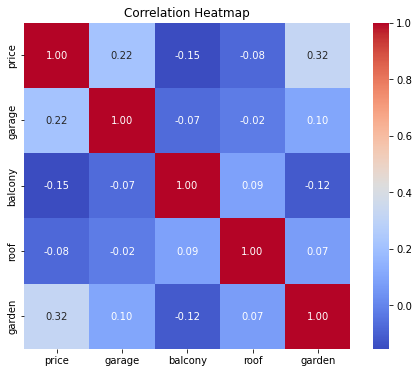

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the desired columns
selected_columns = ['price', 'type', 'garage', 'balcony', 'roof', 'garden', b]
selected_df = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
categorical = ['location', 'type']
numeric = ['garage', 'balcony', 'roof', 'garden', 'bedrooms']

for cat in categorical:
    dummies = pd.get_dummies(df_converted[cat], prefix=cat)
    df_converted = pd.concat([df_converted, dummies], axis=1)
    df_converted.drop(cat, axis=1, inplace=True)

mm_scaler = MinMaxScaler()
for num in numeric:
    df_converted[num] = mm_scaler.fit_transform(df_converted[[num]])

df_converted.head()


KeyError: "None of [Index(['bedrooms'], dtype='object')] are in the [columns]"

In [21]:
X_train = df_converted.query('year < 2021').copy()
y_train = df_converted.query('year < 2021').copy()
X_test = df_converted.query('year == 2021').copy()
y_test = df_converted.query('year == 2021').copy()
X_train.drop(['price'], axis=1, inplace=True)
X_test.drop(['price'], axis=1, inplace=True)
y_train = y_train['price']
y_test =  y_test['price']

In [22]:
param_dist = {
    'n_estimators': [100,1000,5000],
}

rf = RandomForestRegressor()

grid_search_rf = GridSearchCV(rf, param_dist, cv=5)

grid_search_rf.fit(X_train, y_train)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Lowest RMSE found: ", np.abs(grid_search_rf.best_score_))

Best parameters found:  {'n_estimators': 100}
Lowest RMSE found:  0.29076253973301136


In [24]:
prediction = grid_search_rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(rmse)

324842.87835819623


In [25]:
model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.0001, 0.001],
    'max_depth': [3, 5, 7, 9, 11]
}

grid_search_gb = GridSearchCV(model, param_grid, cv=5)
grid_search_gb.fit(X_train, y_train)

# Print the best parameters
print(grid_search_gb.best_params_)

# Evaluate the model
y_pred = grid_search_gb.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

{'learning_rate': 0.001, 'max_depth': 11, 'n_estimators': 300}
Root Mean Squared Error: 424633.81352178537


In [26]:
param_dist = {
    'hidden_layer_sizes': [(60,40, 1), (60,120,60,1), (60, 30, 1)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.5],
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPRegressor()

rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

grid_search_mlp = GridSearchCV(mlp, param_dist, cv=5, scoring=rmse_scorer, n_jobs=-1)

grid_search_mlp.fit(X_train, y_train)

print("Best parameters found: ", grid_search_mlp.best_params_)
print("Lowest RMSE found: ", np.abs(grid_search_mlp.best_score_))

/Users/kylegrange/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kylegrange/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kylegrange/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kylegrange/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

Best parameters found:  {'activation': 'relu', 'alpha': 0.5, 'hidden_layer_sizes': (60, 30, 1), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Lowest RMSE found:  126578.09668696858


/Users/kylegrange/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
